# 1D Tsunami Propagation
##### Nicholas Oselette, Shanty Papakosta

In [55]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import j0
import scipy

Main Focus
We are studying the propagation, reflection, and energy dynamics of long waves in a confined channel using numerical methods. This includes:
Understanding how waves behave in a 1D system under idealized and realistic conditions.
Testing and validating numerical methods to solve the shallow water equations, including the effects of boundary conditions and numerical dissipation.
Examining how physical factors like bathymetry, wave amplitude, and nonlinearity influence wave motion.


### Introduction

Understanding the propagation of long waves, such as tsunamis, is critical for predicting and mitigating the devastating impacts these waves can have on coastal regions. Long waves are characterized by their significant wavelengths relative to the depth of the water, allowing them to traverse vast distances with minimal energy loss. Their behavior in confined channels, such as harbors, fjords, or coastal inlets, is of particular interest due to the potential for resonance, energy amplification, and complex boundary interactions.
This project focuses on the numerical modeling of long wave propagation in a one-dimensional channel. While analytical solutions provide valuable insights for idealized cases, real-world scenarios often require numerical methods to account for complexities such as nonlinearities, varying bathymetry, and boundary effects. By using numerical simulations, we can investigate wave dynamics in scenarios that are difficult to solve analytically, such as interactions with reflective or radiative boundaries, energy dissipation, and resonance phenomena.
The goal of this project is to explore the behavior of long waves in a simplified one-dimensional system, examining how physical parameters, boundary conditions, and numerical methods influence wave propagation and energy dynamics. Through simulations, this study seeks to provide a deeper understanding of long wave behavior in constrained environments, offering insights that can be extended to real-world applications, including tsunami modeling and coastal engineering.


### Figure II.1 Signal propagating from the point x = x1, t = 0 along the characteristics x1 − ut=const and x1 + ut =const

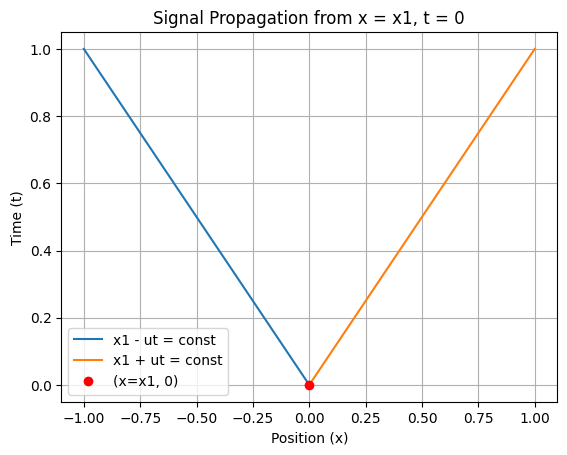

In [56]:
# Define Parameters

x1 = 0
u = 1

t_values = np.linspace(0, 1, 100)

# Functions for two Lines

x_neg = x1 - u * t_values
x_pos = x1 + u * t_values

plt.plot(x_neg, t_values, label='x1 - ut = const')
plt.plot(x_pos, t_values, label='x1 + ut = const')
plt.plot(x1, 0, 'ro', label='(x=x1, 0)')

plt.ylabel('Time (t)')
plt.xlabel('Position (x)')
plt.title('Signal Propagation from x = x1, t = 0')
plt.legend()
plt.grid(True)
plt.show()

### Figure II.2 Wavelength of tsunami waves in the depth varying ocean.

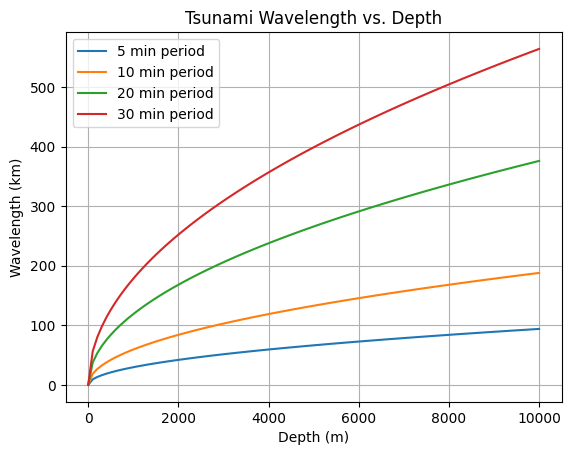

In [ ]:
g = 9.81
depths = np.linspace(0, 10000, 100)
periods = [5, 10, 20, 30]

for period in periods:
  wavelengths = np.sqrt(g * depths) * period * 60 / 1000
  plt.plot(depths, wavelengths, label=f'{period} min period')

plt.xlabel('Depth (m)')
plt.ylabel('Wavelength (km)')
plt.title('Tsunami Wavelength vs. Depth')
plt.legend()
plt.grid(True)
plt.show()

### Equations

##### Solution to Wave Propagation Equation

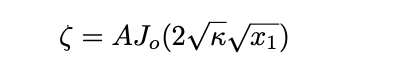

##### Wave Propagation Partial Differential

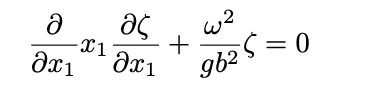

##### Seafloor Equation

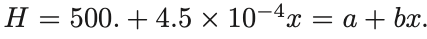

##### Shallow Wave Propagation

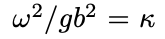

##### Time-Varying Displacement of Wave

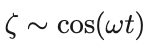

### Figure II.15 Numerical (upper panel) and analytical (lower panel) solutions for the wave traveling up the sloping channel.

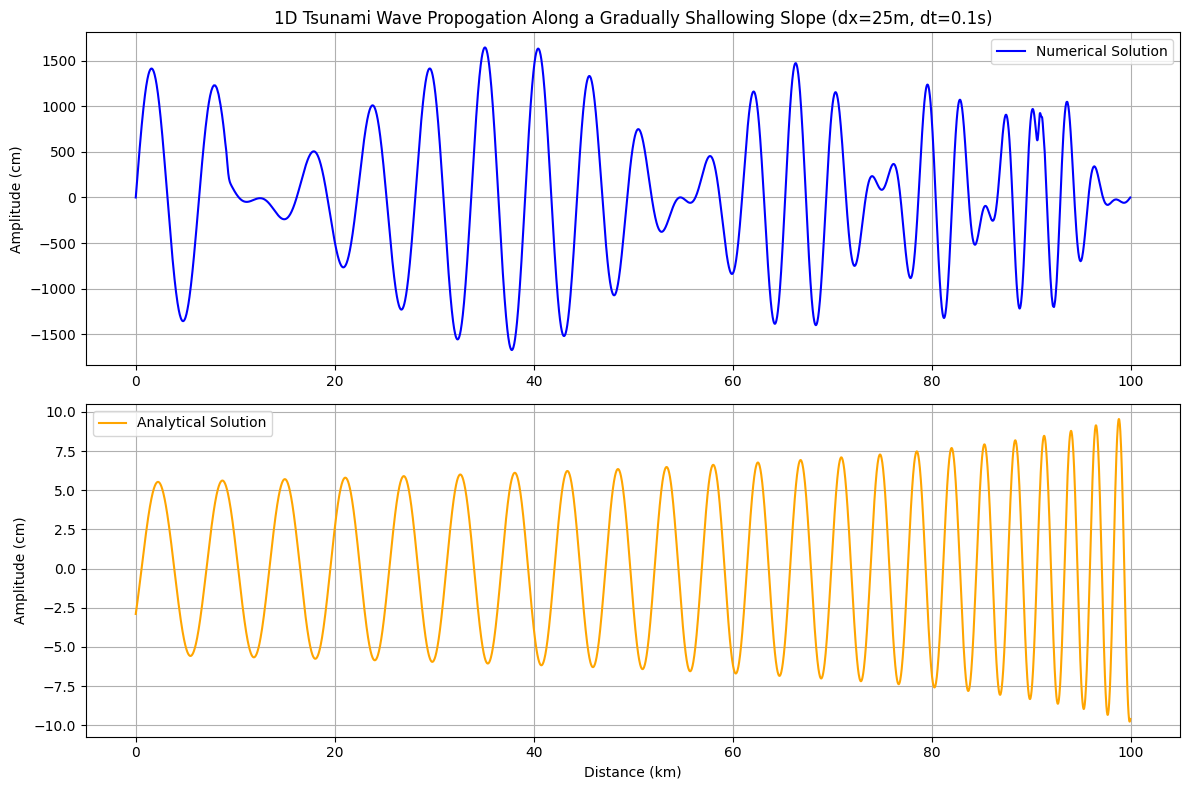

In [59]:
# Define Parameters

a = 5000  # depth at x=0 in cm (50 m)
b = -4.5e-4  # slope of the depth in cm/km (negative for decreasing depth)
g = 980  # gravity in cm/s^2
b2 = b**2 # b^2
T = 300  # wave period in seconds
w = 2 * np.pi / T
k = w**2 / (g * b2) # shallow water wave equation
A = 100  # wave amplitude in cm

# Numerical grid

dx = 25  # spatial step in meters
dt = 0.1  # time step in seconds
x_km = np.arange(0, 100, dx / 1000)  # x domain in km
x_cm = x_km * 1e5
x1 = a + b * x_cm  # depth variation

# Analytical solution

analytical = A * j0(2 * np.sqrt(k) * np.sqrt(x1))

# Numerical solution setup

numerical = np.zeros_like(x_km)
J_prev = np.zeros_like(x_km)  # Previous time step
J_curr = np.zeros_like(x_km)  # Current time step

# Initial condition: sinusoidal wave

J_curr = A * j0(2 * np.sqrt(k) * np.sqrt(x1))

# Time-stepping loop

num_steps = int(T / dt)
for _ in range(num_steps):
    J_next = np.zeros_like(J_curr)
    for i in range(1, len(x_km) - 1):
        J_next[i] = (2 * J_curr[i] - J_prev[i]+ (g * dt**2 / dx**2) * (J_curr[i - 1] - 2 * J_curr[i] + J_curr[i + 1]))
    J_prev = J_curr
    J_curr = J_next


# Assign the numerical solution after the loop

numerical = J_curr

plt.figure(figsize=(12, 8))

# Numerical solution

plt.subplot(2, 1, 1)
plt.plot(x_km, numerical, label="Numerical Solution", color="blue")
plt.title("1D Tsunami Wave Propogation Along a Gradually Shallowing Slope (dx=25m, dt=0.1s)")
plt.ylabel("Amplitude (cm)")
plt.grid()
plt.legend()

# Analytical solution

plt.subplot(2, 1, 2)
plt.plot(x_km, analytical, label="Analytical Solution", color="orange")
plt.xlabel("Distance (km)")
plt.ylabel("Amplitude (cm)")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

### Figure II.16 Comparison of the analytical and numerical solutions after wave traveled 94km up the channel.

In [54]:
# Code that will superimpose Numerical
# Plot over Analytical Plot to determine Error in Method
# Once Code for figure 15.II has been debugged